In [91]:
import pandas as pd


def load_feather(path):
    return pd.read_feather(path)
!pip install pyarrow
DATA_PATH = '/home/workspace/data/.train/.task149/train/train_a.feather'
data=load_feather(DATA_PATH)

  Using cached pyarrow-2.0.0-cp38-cp38-manylinux2014_x86_64.whl (17.8 MB)
  Using cached numpy-1.19.4-cp38-cp38-manylinux2010_x86_64.whl (14.5 MB)


In [92]:
data_1=data.sort_values(by=['승인일자'], axis=0)
#data_2=data_1.dropna()#
data_3=data_1.rename(columns = {"승인일자": "time", "매출금액": "sales"})
grouped=data_3.groupby(['time', 'a']).sales.sum()
data_a=grouped.to_frame()

In [93]:
import numpy as np
tmp=data_a.reset_index()
tmp
tmp.index=np.repeat(pd.date_range('2019-01-01',periods=578),5)
tmp
tmp1=tmp.drop('time',axis=1)

In [94]:
data_1=data.sort_values(by=['승인일자'], axis=0)
#data_2=data_1.dropna()#
data_3=data_1.rename(columns = {"승인일자": "time", "매출금액": "sales"})
grouped=data_3.groupby(['time', 'a']).sales.sum()
data_a=grouped.to_frame()

In [95]:
import numpy as np
tmp=data_a.reset_index()
tmp

,time,a,sales
0,20190101,1,40762559
1,20190101,2,410278011
2,20190101,3,514986047
3,20190101,4,268220405
4,20190101,5,32283138
...,...,...,...
2885,20200731,1,151747519
2886,20200731,2,726492862
2887,20200731,3,659568610
2888,20200731,4,561185887


In [96]:
import numpy as np
tmp=data_a.reset_index()
tmp
tmp.index=np.repeat(pd.date_range('2019-01-01',periods=578),5)
tmp
tmp1=tmp.drop('time',axis=1)

In [97]:
tmp1=tmp.drop('time',axis=1)

<AxesSubplot:>

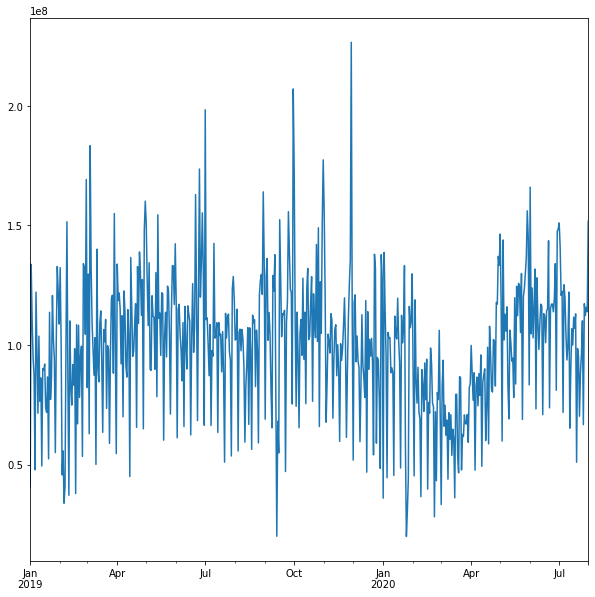

In [98]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
#tmp1['logsales'][0:100].plot()
#plt.ylim(min(tmp1.sales)-10000000, max(tmp1.sales)+10000000)
tmp1[tmp1.a==1]['sales'].plot()

<AxesSubplot:>

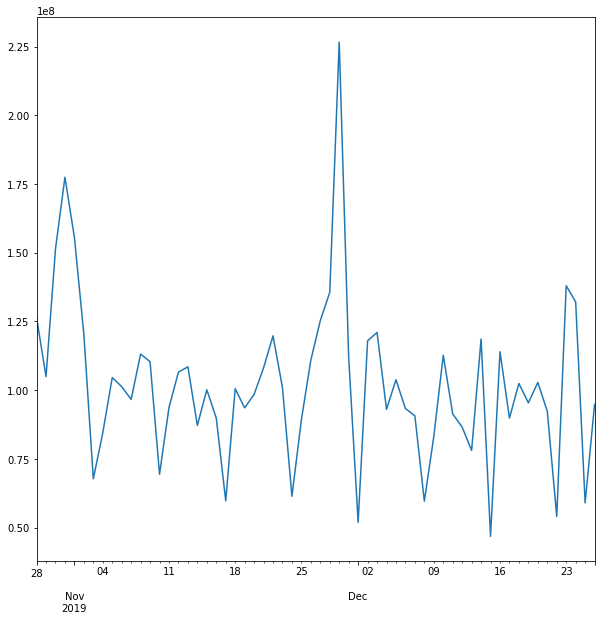

In [99]:
tmp1[tmp1.a==1]['sales'][300:360].plot()

In [100]:
tmp1[tmp1.a==1]['sales'][370:430]
#2019년 9월 13일, 9월 30일, 10월 1일 이상치
#2019 9 13 = mean(65349673,68970335)
#2019 9 14 = 75327935
#2010 9 30 = mean(155786529,177458437)
#2019-11-27    84439227 11-04꺼
#2019-11-28    93537876 11-19꺼
#2019-11-29    120988942 12-03 꺼
#2020-01-25     np.mean([45451770,45260376]) 양옆 꺼

2020-01-06    105260493
2020-01-07    102970049
2020-01-08    103096972
2020-01-09     88355114
2020-01-10     90439981
2020-01-11     88571914
2020-01-12     45451770
2020-01-13    112100519
2020-01-14    104308694
2020-01-15    102549364
2020-01-16    119606401
2020-01-17    102001022
2020-01-18     92506546
2020-01-19     48565939
2020-01-20    112398512
2020-01-21    100902421
2020-01-22    105912099
2020-01-23    133213306
2020-01-24     58182535
2020-01-25     19910748
2020-01-26     30339110
2020-01-27     44140276
2020-01-28    116155019
2020-01-29    107241696
2020-01-30    109738675
2020-01-31    129770560
2020-02-01     89307336
2020-02-02     45260376
2020-02-03    118891925
2020-02-04     85435091
2020-02-05     75698525
2020-02-06     90688225
2020-02-07     71984109
2020-02-08     69046471
2020-02-09     36574530
2020-02-10     89705202
2020-02-11     83361231
2020-02-12     72187551
2020-02-13     92513052
2020-02-14     77087653
2020-02-15     94067562
2020-02-16     3

In [101]:
#2019 9 13 = np.mean(65349673,68970335)
#2019 9 14 = 75327935
#2019 9 30= np.mean(155786529,177458437)

In [102]:
a=tmp1[tmp1.a==1]

In [103]:
a.loc['2019-09-13']=[1,np.mean([65349673,68970335])]
a.loc['2019-09-14']=[1,75327935]
a.loc['2019-09-30']=[1,np.mean([155786529,177458437])]
#2019-11-27    84439227 11-04꺼
#2019-11-28    93537876 11-19꺼
#2019-11-29    120988942 12-03 꺼
a.loc['2019-11-27']=84439227
a.loc['2019-11-28']=93537876
a.loc['2019-11-29']=120988942
a.loc['2020-01-25']=[1,np.mean([45451770,45260376])]

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


<AxesSubplot:>

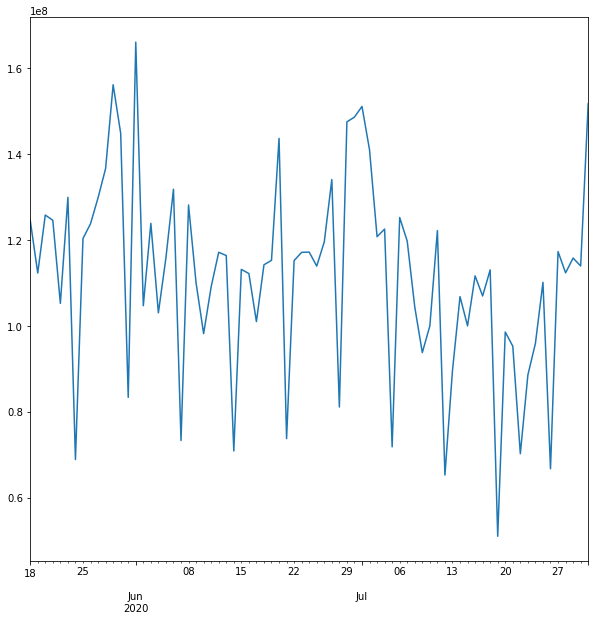

In [104]:
a[a.a==1]['sales'][500:].plot()

<AxesSubplot:>

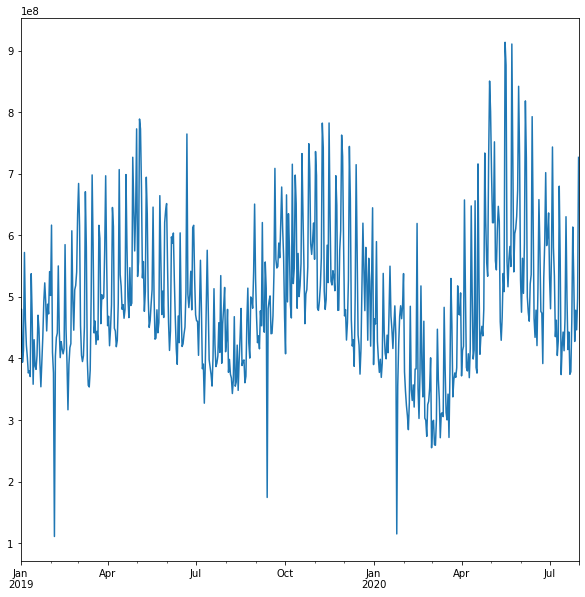

In [105]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
#tmp1['logsales'][0:100].plot()
#plt.ylim(min(tmp1.sales)-10000000, max(tmp1.sales)+10000000)
tmp1[tmp1.a==2]['sales'].plot()

<AxesSubplot:>

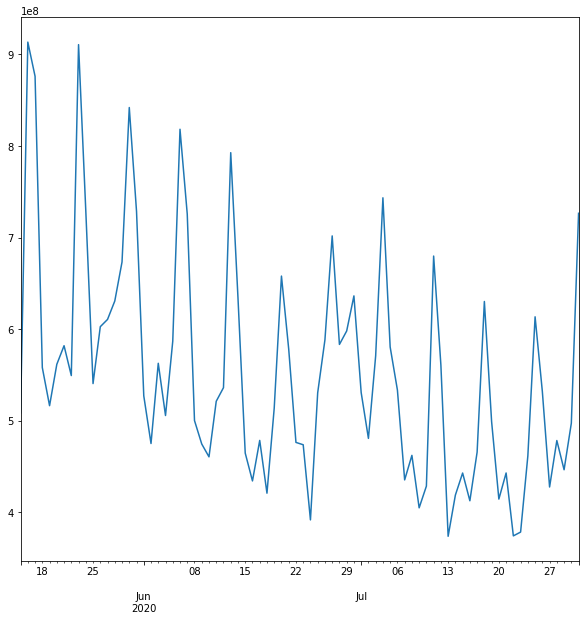

In [106]:
tmp1[tmp1.a==2]['sales'][500:].plot()

In [107]:
tmp1[tmp1.a==2]['sales'][530:]


2020-06-14    634157024
2020-06-15    464548566
2020-06-16    434146037
2020-06-17    478385381
2020-06-18    420758990
2020-06-19    513628957
2020-06-20    657903884
2020-06-21    578205714
2020-06-22    476212999
2020-06-23    473652999
2020-06-24    391586831
2020-06-25    530445174
2020-06-26    588281988
2020-06-27    701773906
2020-06-28    583238151
2020-06-29    597930315
2020-06-30    636258041
2020-07-01    530665360
2020-07-02    480614534
2020-07-03    570796514
2020-07-04    743402357
2020-07-05    580455810
2020-07-06    533489645
2020-07-07    435268877
2020-07-08    462062108
2020-07-09    404753711
2020-07-10    428478084
2020-07-11    679772497
2020-07-12    560721350
2020-07-13    373668013
2020-07-14    418678034
2020-07-15    442773749
2020-07-16    412476915
2020-07-17    465619776
2020-07-18    630148446
2020-07-19    498848567
2020-07-20    414314457
2020-07-21    442817338
2020-07-22    374124013
2020-07-23    378275577
2020-07-24    461473559
2020-07-25    61

In [108]:
tmp1[tmp1.a==2]['sales'][360:420]
#2019-02-05    np.mean([353892279,316493220])
#2019-09-13    np.mean([440034360, 440648925,469181375])   2019-09-17    2019-09-18   2019-09-19 꺼
#2020-01-25     284209564 2020-02-06  값

2019-12-27    562637320
2019-12-28    525463387
2019-12-29    419913120
2019-12-30    528055682
2019-12-31    644629514
2020-01-01    389929776
2020-01-02    464407345
2020-01-03    455831900
2020-01-04    589708385
2020-01-05    427814233
2020-01-06    398918685
2020-01-07    377237343
2020-01-08    398560874
2020-01-09    369146480
2020-01-10    393055601
2020-01-11    538068126
2020-01-12    442996347
2020-01-13    408115230
2020-01-14    399293429
2020-01-15    437774367
2020-01-16    409200468
2020-01-17    474180267
2020-01-18    549799457
2020-01-19    468835608
2020-01-20    446650840
2020-01-21    416069563
2020-01-22    451599002
2020-01-23    485310684
2020-01-24    439479760
2020-01-25    114826236
2020-01-26    355669279
2020-01-27    424234869
2020-01-28    468296456
2020-01-29    485487921
2020-01-30    464486384
2020-01-31    485635809
2020-02-01    537761310
2020-02-02    378258087
2020-02-03    347051826
2020-02-04    323460390
2020-02-05    306881552
2020-02-06    28

In [109]:
a2=tmp1[tmp1.a==2]

In [110]:
a2.loc['2019-02-05']=[2,np.mean([353892279,316493220])]
a2.loc['2019-09-13']  =[2,np.mean([440034360, 440648925,469181375])]
a2.loc['2020-01-25']=     [2,284209564]

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [111]:
a2.loc['2019-02-05']
a2.loc['2019-09-13']

a        2.000000e+00
sales    4.499549e+08
Name: 2019-09-13 00:00:00, dtype: float64

<AxesSubplot:>

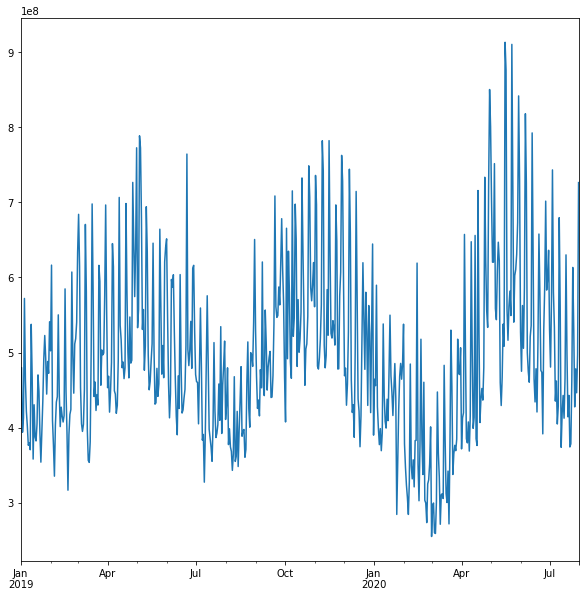

In [112]:
a2[a2.a==2]['sales'].plot()

<AxesSubplot:>

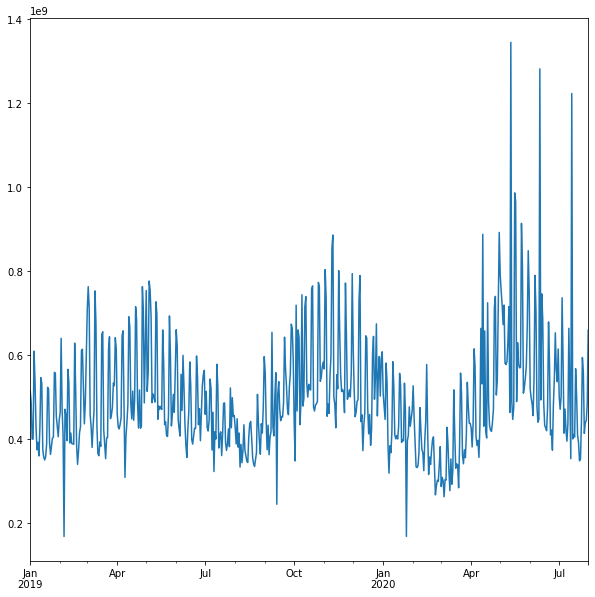

In [113]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
#tmp1['logsales'][0:100].plot()
#plt.ylim(min(tmp1.sales)-10000000, max(tmp1.sales)+10000000)
tmp1[tmp1.a==3]['sales'].plot()

<AxesSubplot:>

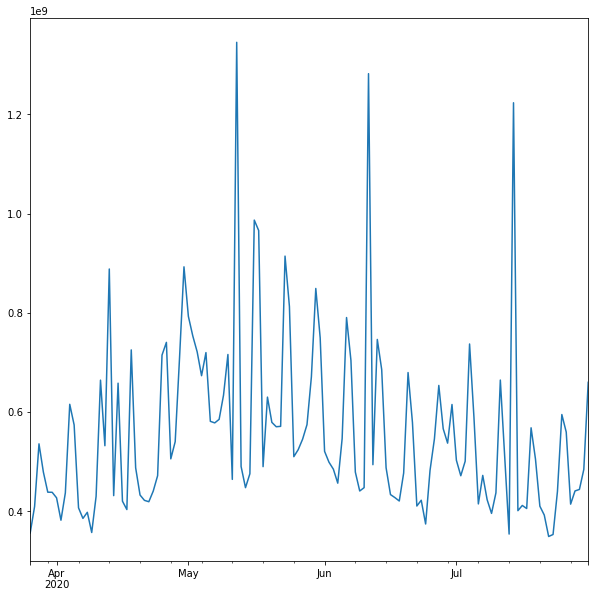

In [114]:
tmp1[tmp1.a==3]['sales'][450:].plot()
# 2019-02-05    np.mean([363722965, 405789777])     2019-01-22     2019-01-30   값
#2019-04-09    np.mean([424374358,448084730])  308845519    2019-04-03       2019-04-16    
# 2019-09-13    np.mean([407719035,443903217])        2019-09-10     2019-09-17    값
# 2020-01-25    np.mean([396132835,430749035])    2020-01-22     2020-01-29    값
#2020-05-12   np.mean([892590197,986845453])    2020-04-30      2020-05-16     값
#2020-06-11    np.mean([546254620,476602083])           2020-06-05         2020-06-19    값 
#2020-07-14    np.mean([  664144833, 567810076])    2020-07-11     2020-07-18    값


In [115]:
4*0.8

3.2

In [116]:
0.7*1.2


0.84

In [117]:
tmp1[tmp1.a==3]['sales'][500:560]

2020-05-15     475118288
2020-05-16     986845453
2020-05-17     965891663
2020-05-18     489416766
2020-05-19     629722437
2020-05-20     578767527
2020-05-21     569936393
2020-05-22     570763631
2020-05-23     914210456
2020-05-24     812462566
2020-05-25     509554162
2020-05-26     523762489
2020-05-27     544903433
2020-05-28     574271573
2020-05-29     670741857
2020-05-30     848945705
2020-05-31     749362531
2020-06-01     520300593
2020-06-02     498461956
2020-06-03     484344392
2020-06-04     456114950
2020-06-05     546254620
2020-06-06     790274576
2020-06-07     703675689
2020-06-08     478503235
2020-06-09     440332422
2020-06-10     447072527
2020-06-11    1282299623
2020-06-12     493392477
2020-06-13     746090160
2020-06-14     685292308
2020-06-15     487176028
2020-06-16     433087898
2020-06-17     427023011
2020-06-18     420129380
2020-06-19     476602083
2020-06-20     679283402
2020-06-21     578582421
2020-06-22     410010525
2020-06-23     421641989


In [118]:
tmp1[tmp1.a==3]['sales'][90:150]

2019-04-01    460979057
2019-04-02    429588648
2019-04-03    424374358
2019-04-04    435163899
2019-04-05    451025112
2019-04-06    646036386
2019-04-07    658240856
2019-04-08    487072293
2019-04-09    308845519
2019-04-10    405520997
2019-04-11    439479621
2019-04-12    481763686
2019-04-13    691655802
2019-04-14    667118160
2019-04-15    487065512
2019-04-16    448084730
2019-04-17    514565080
2019-04-18    444985907
2019-04-19    493355662
2019-04-20    715726023
2019-04-21    684468626
2019-04-22    486713966
2019-04-23    426579956
2019-04-24    517057206
2019-04-25    426114313
2019-04-26    430528181
2019-04-27    763121477
2019-04-28    707554093
2019-04-29    486278607
2019-04-30    624114731
2019-05-01    754104897
2019-05-02    513841436
2019-05-03    557807553
2019-05-04    776809757
2019-05-05    755311343
2019-05-06    692168857
2019-05-07    486886604
2019-05-08    507690687
2019-05-09    500683387
2019-05-10    488245349
2019-05-11    727341757
2019-05-12    69

In [119]:
a3=tmp1[tmp1.a==3]

In [120]:
a3.loc['2019-02-05']=   [3,np.mean([363722965, 405789777])]
a3.loc['2019-09-13']=    [3,np.mean([407719035,443903217])]
a3.loc['2020-01-25']=[3, np.mean([396132835,430749035]) ]
a3.loc['2020-05-12']=[3,   np.mean([892590197,986845453])]
a3.loc['2020-06-11']=[3,np.mean([546254620,476602083]) ]
a3.loc['2020-07-14']=[3,   np.mean([  664144833, 567810076]) ]
a3.loc['2019-04-09']   = [3,np.mean([424374358,448084730])] #  308845519    2019-04-03       2019-04-16    

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [121]:
a3.loc['2019-02-05']

a                3.0
sales    384756371.0
Name: 2019-02-05 00:00:00, dtype: float64

<AxesSubplot:>

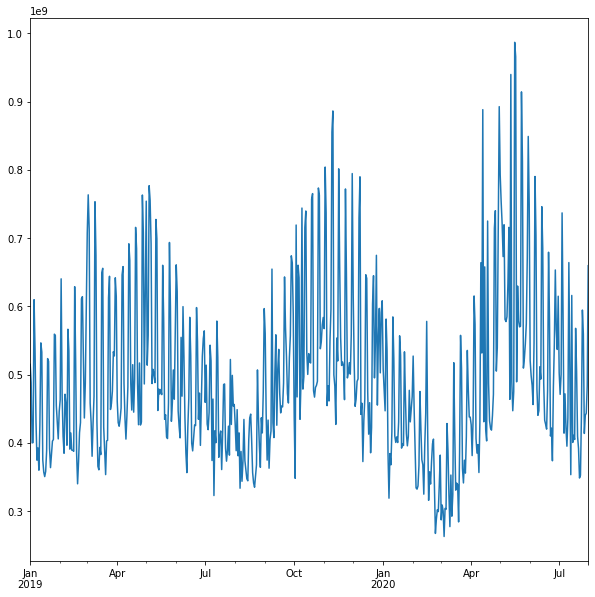

In [122]:
a3[a3.a==3]['sales'].plot()

<AxesSubplot:>

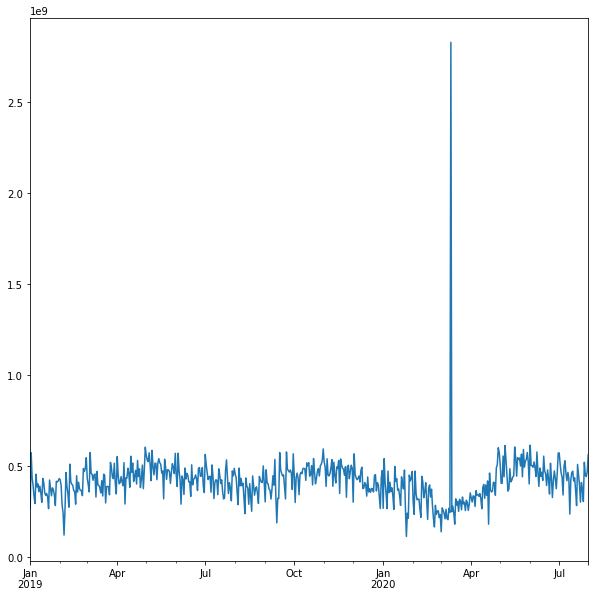

In [123]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
#tmp1['logsales'][0:100].plot()
#plt.ylim(min(tmp1.sales)-10000000, max(tmp1.sales)+10000000)
tmp1[tmp1.a==4]['sales'].plot()

<AxesSubplot:>

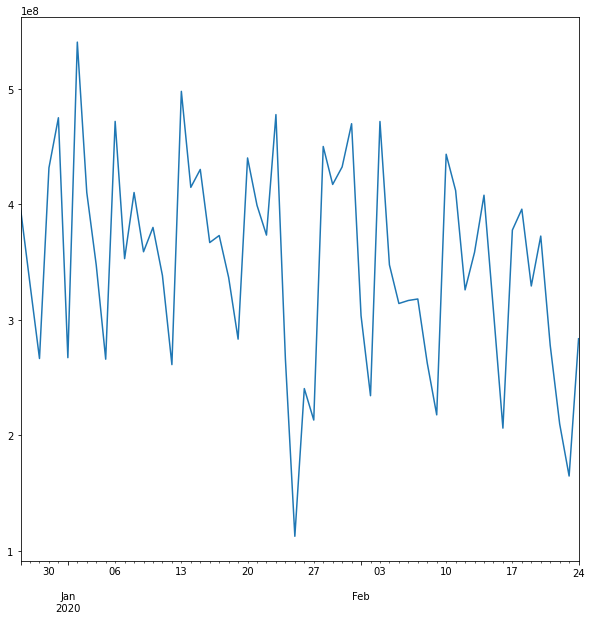

In [124]:
tmp1[tmp1.a==4]['sales'][360:420].plot()

#2020-03-11   np.mean([267376079,279396757]) 2020-03-09      2020-03-13    
#2019-02-05    np.mean([282769066, 273479633])   2019-01-27     2019-02-10  
#2020-01-25    np.mean([283331746,234350494])  2020-01-19     2020-02-02    

In [125]:
tmp1[tmp1.a==4]['sales'][360:420]

2019-12-27    396093593
2019-12-28    330872061
2019-12-29    266558327
2019-12-30    431696379
2019-12-31    475050632
2020-01-01    267280857
2020-01-02    540555977
2020-01-03    410327052
2020-01-04    347484114
2020-01-05    265974747
2020-01-06    471901731
2020-01-07    353038267
2020-01-08    410306158
2020-01-09    358998900
2020-01-10    380079972
2020-01-11    338401903
2020-01-12    261257446
2020-01-13    497912107
2020-01-14    414779388
2020-01-15    430288116
2020-01-16    366960837
2020-01-17    373067152
2020-01-18    336738747
2020-01-19    283331746
2020-01-20    440234904
2020-01-21    399181946
2020-01-22    373440040
2020-01-23    477780105
2020-01-24    266361198
2020-01-25    112602638
2020-01-26    240525204
2020-01-27    213267356
2020-01-28    450172874
2020-01-29    417302590
2020-01-30    432474415
2020-01-31    469893413
2020-02-01    303613620
2020-02-02    234350494
2020-02-03    471820021
2020-02-04    347691270
2020-02-05    314192149
2020-02-06    31

In [126]:
a4=tmp1[tmp1.a==4]

In [127]:
a4.loc['2020-03-11']=[4,   np.mean([267376079,279396757])]
a4.loc['2019-02-05']=[4,    np.mean([282769066, 273479633])]
a4.loc['2020-01-25']=[4,    np.mean([283331746,234350494])]

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


<AxesSubplot:>

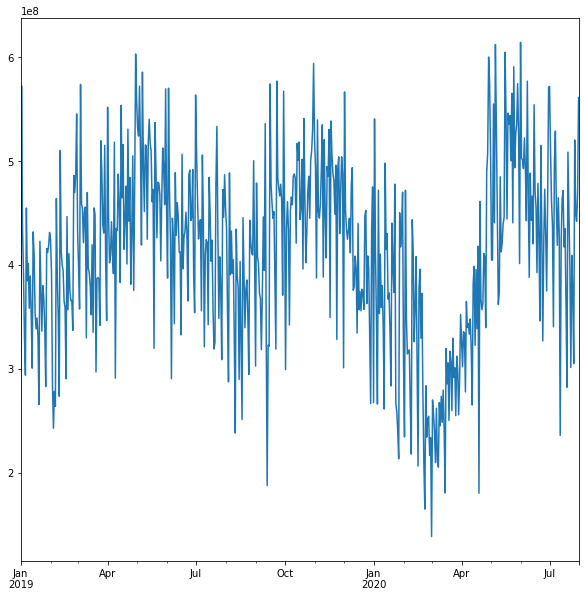

In [128]:
a4[a4.a==4]['sales'].plot()

<AxesSubplot:>

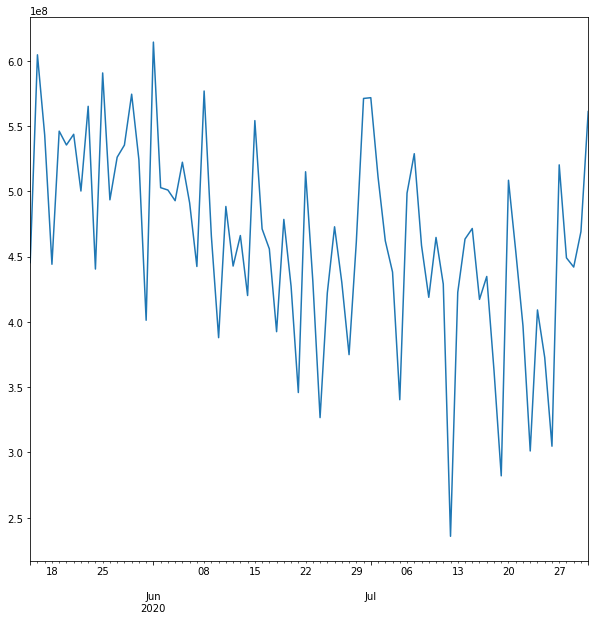

In [129]:
a4[a4.a==4]['sales'][500:].plot()

In [130]:
a4[a4.a==4]['sales'][560:]

2020-07-14    463464879.0
2020-07-15    471582217.0
2020-07-16    417272950.0
2020-07-17    434827647.0
2020-07-18    362915478.0
2020-07-19    282107475.0
2020-07-20    508527481.0
2020-07-21    454242442.0
2020-07-22    396977398.0
2020-07-23    301144001.0
2020-07-24    409180705.0
2020-07-25    372770525.0
2020-07-26    304791565.0
2020-07-27    520321264.0
2020-07-28    449077102.0
2020-07-29    442039341.0
2020-07-30    469230500.0
2020-07-31    561185887.0
Name: sales, dtype: float64

<AxesSubplot:>

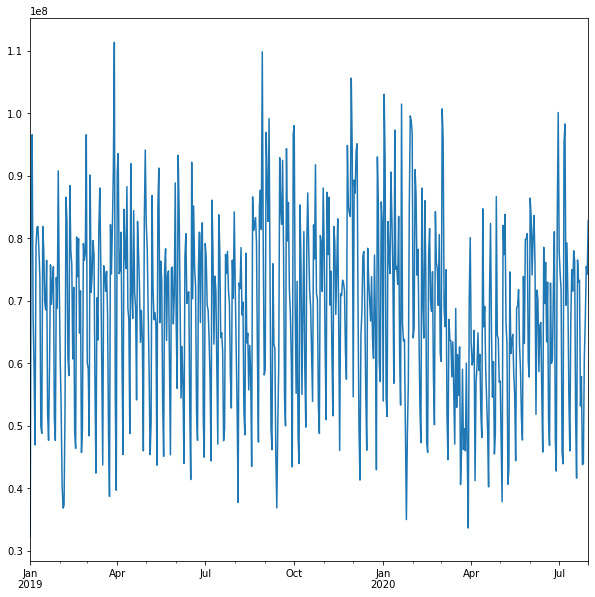

In [131]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
#tmp1['logsales'][0:100].plot()
#plt.ylim(min(tmp1.sales)-10000000, max(tmp1.sales)+10000000)
tmp1[tmp1.a==5]['sales'].plot()

<AxesSubplot:>

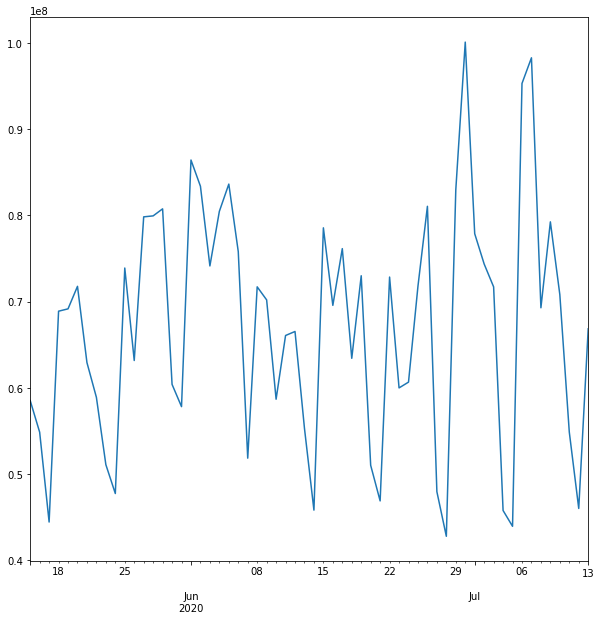

In [132]:
tmp1[tmp1.a==5]['sales'][500:560].plot()

In [133]:
tmp1[tmp1.a==5]['sales'][500:560]

2020-05-15     58505478
2020-05-16     54835819
2020-05-17     44404390
2020-05-18     68885929
2020-05-19     69157729
2020-05-20     71771776
2020-05-21     62918674
2020-05-22     58879953
2020-05-23     51065608
2020-05-24     47714413
2020-05-25     73898146
2020-05-26     63160682
2020-05-27     79839633
2020-05-28     79953422
2020-05-29     80770620
2020-05-30     60386016
2020-05-31     57804291
2020-06-01     86439034
2020-06-02     83393594
2020-06-03     74140245
2020-06-04     80479687
2020-06-05     83643678
2020-06-06     75801117
2020-06-07     51821231
2020-06-08     71714410
2020-06-09     70197169
2020-06-10     58665107
2020-06-11     66064024
2020-06-12     66529963
2020-06-13     55276734
2020-06-14     45788502
2020-06-15     78565198
2020-06-16     69562517
2020-06-17     76150342
2020-06-18     63415450
2020-06-19     73002071
2020-06-20     50992631
2020-06-21     46857413
2020-06-22     72849096
2020-06-23     59978684
2020-06-24     60650210
2020-06-25     7

<AxesSubplot:>

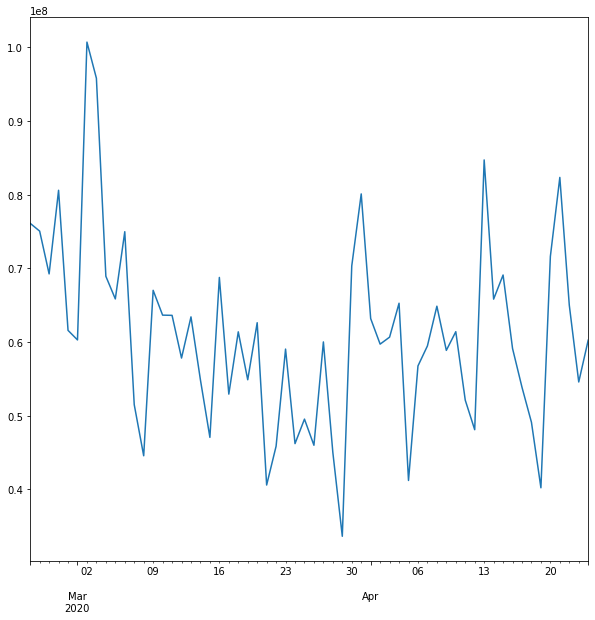

In [134]:
tmp1[tmp1.a==5]['sales'][420:480].plot()

In [135]:
tmp1[tmp1.a==5]['sales'][420:480]

2020-02-25     76118869
2020-02-26     75062616
2020-02-27     69255200
2020-02-28     80607322
2020-02-29     61590238
2020-03-01     60292701
2020-03-02    100721442
2020-03-03     95815285
2020-03-04     68932297
2020-03-05     65858504
2020-03-06     74983820
2020-03-07     51503881
2020-03-08     44565800
2020-03-09     67026316
2020-03-10     63657732
2020-03-11     63628623
2020-03-12     57833069
2020-03-13     63420573
2020-03-14     54860165
2020-03-15     47065724
2020-03-16     68775681
2020-03-17     52935639
2020-03-18     61391957
2020-03-19     54886124
2020-03-20     62629518
2020-03-21     40594944
2020-03-22     45866008
2020-03-23     59048737
2020-03-24     46215781
2020-03-25     49542535
2020-03-26     45993617
2020-03-27     60021052
2020-03-28     45015755
2020-03-29     33635966
2020-03-30     70340815
2020-03-31     80113623
2020-04-01     63191584
2020-04-02     59722715
2020-04-03     60671720
2020-04-04     65274619
2020-04-05     41214022
2020-04-06     5

In [136]:
a5=tmp1[tmp1.a==5]

In [137]:
a5.loc['2020-03-11']=[4,   np.mean([267376079,279396757])]

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


<AxesSubplot:>

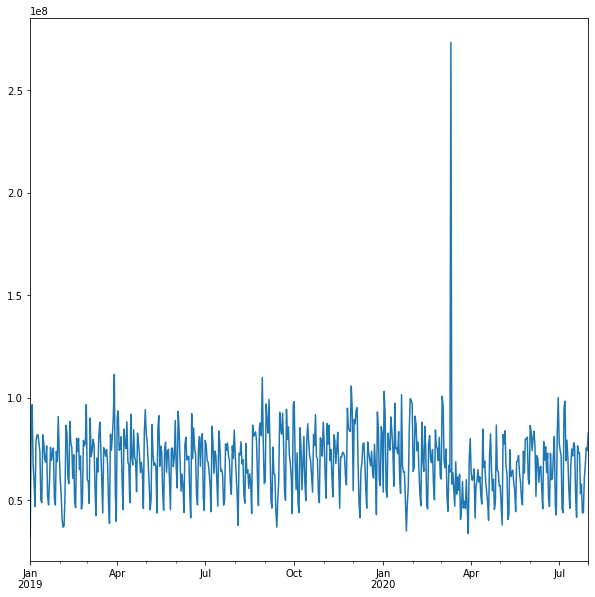

In [138]:
a5['sales'].plot()

<AxesSubplot:>

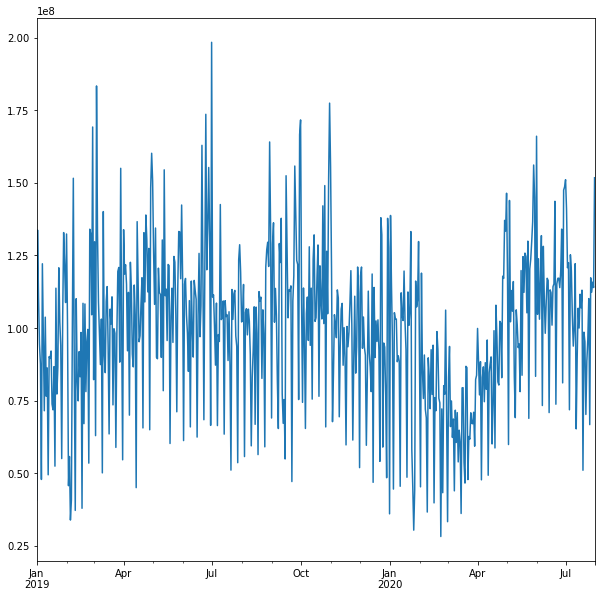

In [139]:
a['sales'].plot()

<AxesSubplot:>

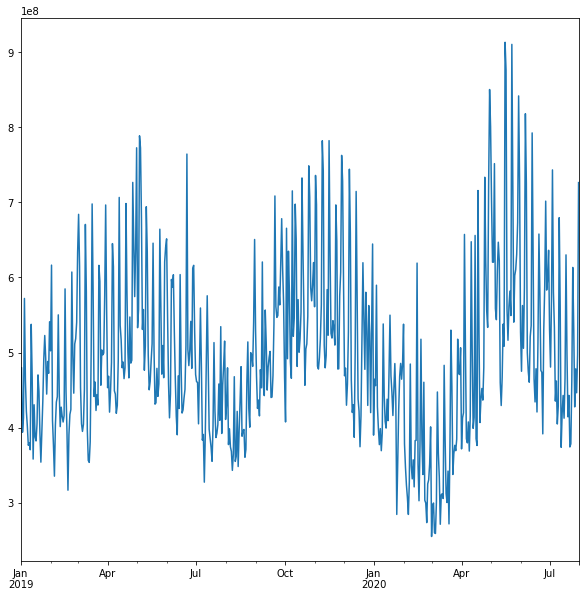

In [140]:
a2['sales'].plot()

<AxesSubplot:>

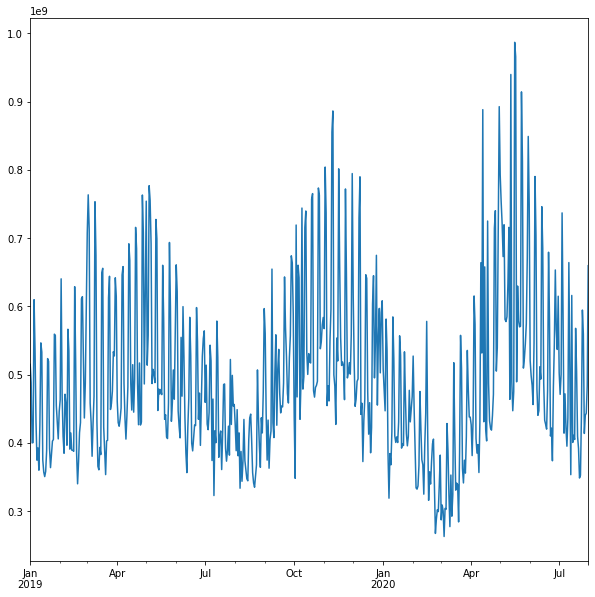

In [141]:
a3['sales'].plot()

<AxesSubplot:>

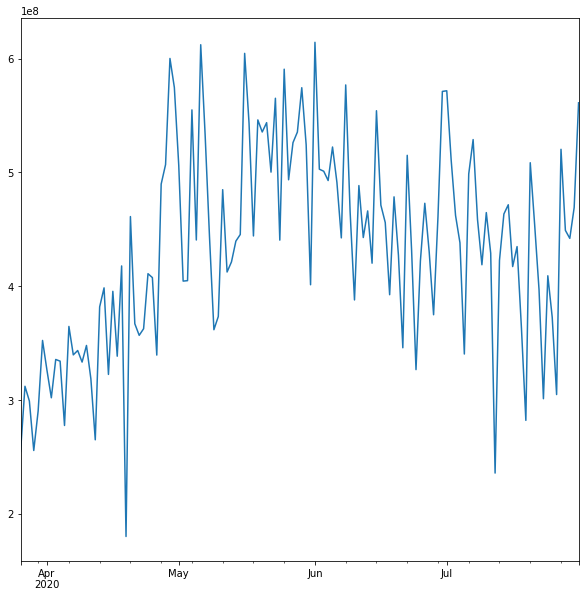

In [142]:
a4['sales'][450:].plot()

<AxesSubplot:>

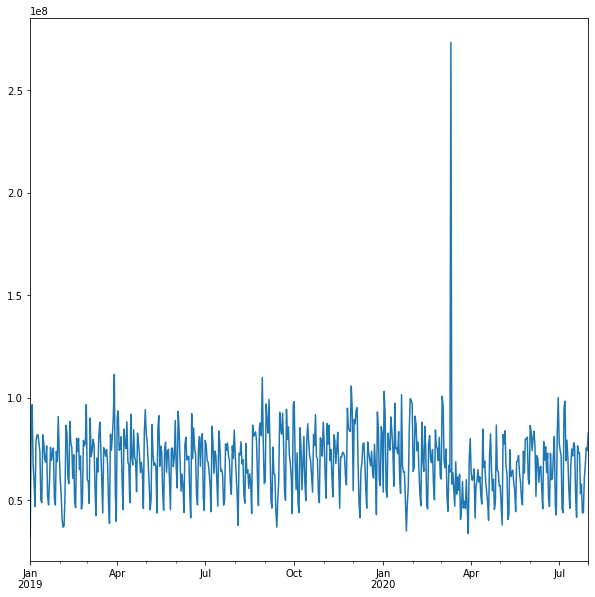

In [143]:
a5['sales'].plot()

In [144]:
a.to_csv("a_business_time1_edit.csv")
a2.to_csv("a_business_time2_edit.csv")
a3.to_csv("a_business_time3_edit.csv")
a4.to_csv("a_business_time4_edit.csv")

In [145]:
a5.to_csv("a_business_time5_edit.csv")